# Credit Card Fraud Detection
## Gunjan Kumar

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Importing Packages

In [2]:
import pandas as pd # data processing
import numpy as np # numarical computation and for working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # advance visualization
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LogisticRegression # Logistic Regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Importing Data

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data preprossing and EDA

In [4]:
# count & percentage


no_of_total_cases = len(df)
no_of_non_fraud_count = len(df[df.Class == 0])
no_of_fraud_count = len(df[df.Class == 1])
fraud_percentage = round(((no_of_fraud_count/no_of_total_cases)*100), 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl(f'Total number of cases are {no_of_total_cases}', attrs = ['bold']))
print(cl(f'Number of non-fraud cases are {no_of_non_fraud_count}', attrs = ['bold']))
print(cl(f'Number of fraud cases are {no_of_fraud_count}', attrs = ['bold']))
print(cl(f'Percentage of fraud cases are {fraud_percentage}', attrs = ['bold']))
print(cl('---------------------------------------------------------', attrs = ['bold']))

CASE COUNT
---------------------------------------------------------
Total number of cases are 284807
Number of non-fraud cases are 284315
Number of fraud cases are 492
Percentage of fraud cases are 0.17
---------------------------------------------------------


In [5]:
# Description

non_fraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATISTICS', attrs = ['bold']))
print(non_fraud_cases.Amount.describe())
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATISTICS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('---------------------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
---------------------------------------------------------
NON-FRAUD CASE AMOUNT STATISTICS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
---------------------------------------------------------
FRAUD CASE AMOUNT STATISTICS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
---------------------------------------------------------


In [6]:
#  Data Pre-Processing


sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(5), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64


In [7]:
# Data Split


X = df.drop('Class', axis = 1).values
y = df.Class.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_train[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Modeling

In [8]:
# 1. Logistic Regression


model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
lr_predict = model_lr.predict(X_test)


# 2. Random Forest


model_rf = RandomForestClassifier(max_depth=6)
model_rf.fit(X_train, y_train)
rf_predict = model_rf.predict(X_test)

Model Evaluation Report

In [9]:
# 1. Accuracy score


print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl(f'Accuracy score of Logistic Regression model is {accuracy_score(y_test, lr_predict)}', attrs = ['bold'], color = 'red'))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl(f'Accuracy score of Random Forest model is {accuracy_score(y_test, rf_predict)}', attrs = ['bold'], color = 'green'))
print(cl('---------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
---------------------------------------------------------
Accuracy score of Logistic Regression model is 0.9991924440855307
---------------------------------------------------------
Accuracy score of Random Forest model is 0.9993504441557529
---------------------------------------------------------


In [10]:
# 2. F1 Score


print(cl('F1 SCORE', attrs = ['bold']))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl(f'F1 score of Logistic Regression model is {f1_score(y_test, lr_predict)}', attrs = ['bold'], color = 'red'))
print(cl('---------------------------------------------------------', attrs = ['bold']))
print(cl(f'F1 score of Random Forest model is {f1_score(y_test, rf_predict)}', attrs = ['bold'], color = 'green'))
print(cl('---------------------------------------------------------', attrs = ['bold']))

F1 SCORE
---------------------------------------------------------
F1 score of Logistic Regression model is 0.7356321839080459
---------------------------------------------------------
F1 score of Random Forest model is 0.7955801104972375
---------------------------------------------------------


In [11]:
# 3. Confusion Matrix


# 1. Logistic Regression

lr_cmatrix = np.array(confusion_matrix(y_test, lr_predict, labels=[0,1]))
lr_confusion = pd.DataFrame(lr_cmatrix, index=['Non-Default(0)', 'Default(1)'], columns=['Predicted Non-Default(0)', 'Predicted Default(1)'])
lr_confusion

,Predicted Non-Default(0),Predicted Default(1)
Non-Default(0),56852,9
Default(1),37,64


In [12]:
# 2. Random Forest

rf_cmatrix = np.array(confusion_matrix(y_test, rf_predict, labels=[0,1]))
rf_confusion = pd.DataFrame(rf_cmatrix, index=['Non-Default(0)', 'Default(1)'], columns=['Predicted Non-Default(0)', 'Predicted Default(1)'])
rf_confusion 

,Predicted Non-Default(0),Predicted Default(1)
Non-Default(0),56853,8
Default(1),29,72


Text(50.72222222222221, 0.5, 'True')

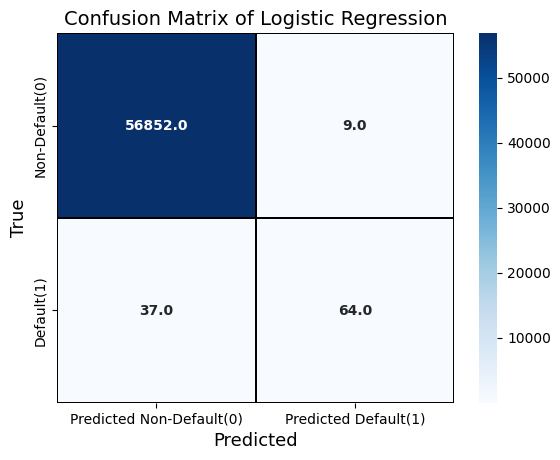

In [13]:
# Plot Confusion Matrix


# 1. logistic Regression

s = sns.heatmap(lr_confusion, cmap='Blues', annot=True, annot_kws={"size": 10, "weight":"bold"}, linewidth=.1, linecolor='black', fmt='.1f')
s.set_title("Confusion Matrix of Logistic Regression", fontsize=14)
s.set_xlabel("Predicted", fontsize=13)
s.set_ylabel("True", fontsize=13)

Text(50.72222222222221, 0.5, 'True')

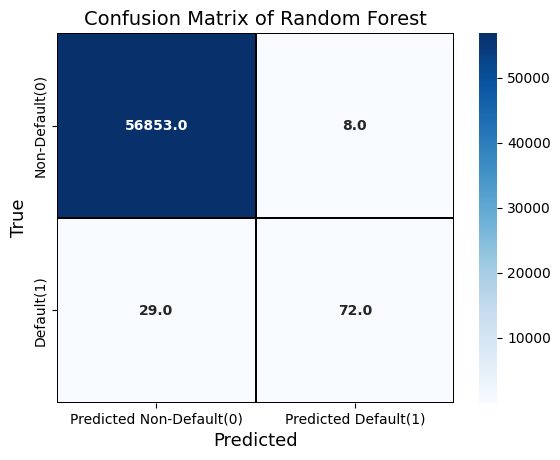

In [14]:
# 2. Random Forest

s = sns.heatmap(rf_confusion, cmap='Blues', annot=True, annot_kws={"size": 10, "weight":"bold"}, linewidth=.1, linecolor='black', fmt='.1f')
s.set_title("Confusion Matrix of Random Forest", fontsize=14)
s.set_xlabel("Predicted", fontsize=13)
s.set_ylabel("True", fontsize=13)